In [2]:
import pandas as pd
import numpy as np

# Reading the ICD and FAO datasets

In [2]:
merged_icd_path = r"C:\Users\Aleksandar\Downloads\Mortality\CSV датотеки\mergedicd.csv"

chunks = []

for chunk in pd.read_csv(merged_icd_path, chunksize=200000, low_memory=False):
    chunks.append(chunk)

data_icd = pd.concat(chunks, axis = 0)
del chunks

In [3]:
data_icd.head()

,Unnamed: 0,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,0,1125,NaN,NaN,1955,07A,A000,1,1,8,...,2013.0,2727.0,4126.0,NaN,NaN,214.0,40543.0,NaN,NaN,NaN
1,1,1125,NaN,NaN,1955,07A,A000,2,1,8,...,1745.0,3465.0,5963.0,NaN,NaN,82.0,39632.0,NaN,NaN,NaN
2,2,1125,NaN,NaN,1955,07A,A001,1,1,8,...,8.0,6.0,2.0,NaN,NaN,1.0,6.0,NaN,NaN,NaN
3,3,1125,NaN,NaN,1955,07A,A001,2,1,8,...,2.0,1.0,2.0,NaN,NaN,0.0,4.0,NaN,NaN,NaN
4,4,1125,NaN,NaN,1955,07A,A002,1,1,8,...,0.0,0.0,0.0,NaN,NaN,0.0,7.0,NaN,NaN,NaN


In [42]:
merged_fao_path = r"C:\Users\Aleksandar\Downloads\Mortality\CSV датотеки\mergedfao.csv"

data_fao = pd.read_csv(merged_fao_path)

In [43]:
data_fao.head()

,Unnamed: 0,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,0,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1000 persons,8954.00,NaN,...,30552.00,NaN,33370.79,S,34413.6,S,35383.03,S,36296.11,S
1,1,2,Afghanistan,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2999.00,Fc,...,2090.00,Fc,2019.0,Fc,1978.0,Fc,2001.0,Fc,2000.0,Fc
2,2,2,Afghanistan,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,84.91,Fc,...,58.25,Fc,56.11,Fc,54.62,Fc,54.56,Fc,54.09,Fc
3,3,2,Afghanistan,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,37.51,Fc,...,33.52,Fc,32.77,Fc,30.41,Fc,31.24,Fc,30.62,Fc
4,4,2,Afghanistan,2903,Vegetal Products,664,Food supply (kcal/capita/day),kcal/capita/day,2752.00,Fc,...,1873.00,Fc,1795.0,Fc,1774.0,Fc,1806.0,Fc,1809.0,Fc


## Remove some irrelevant columns (YxxxxF, area code, item code, element code)

In [44]:
data_fao = data_fao.loc[:, ~(data_fao.columns.str.startswith('Y') & data_fao.columns.str.endswith('F'))]
data_fao = data_fao.drop(columns=["Area", "Item Code", "Element Code", "Unnamed: 0"])
data_fao.head()

,Area Code,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Population,Total Population - Both sexes,1000 persons,8954.00,9142.00,9340.00,9547.00,9765.00,9990.00,...,27032.00,27708.00,28398.00,29105.00,29825.00,30552.00,33370.79,34413.6,35383.03,36296.11
1,2,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2999.00,2917.00,2698.00,2953.00,2956.00,2737.00,...,2041.00,2081.00,2104.00,2107.00,2100.00,2090.00,2019.0,1978.0,2001.0,2000.0
2,2,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,84.91,82.98,77.12,83.49,83.86,79.17,...,56.96,57.79,58.14,58.91,58.91,58.25,56.11,54.62,54.56,54.09
3,2,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,37.51,37.61,38.57,38.95,39.73,39.95,...,29.72,30.72,33.88,33.08,33.37,33.52,32.77,30.41,31.24,30.62
4,2,Vegetal Products,Food supply (kcal/capita/day),kcal/capita/day,2752.00,2672.00,2438.00,2690.00,2682.00,2445.00,...,1831.00,1871.00,1888.00,1891.00,1883.00,1873.00,1795.0,1774.0,1806.0,1809.0


## Concatenating the Item, Element and Unit columns into one

In [45]:
data_fao['Item,Element,Unit'] = data_fao[data_fao.columns[1:4]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

data_fao

,Area Code,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,"Item,Element,Unit"
0,2,Population,Total Population - Both sexes,1000 persons,8954.00,9142.00,9340.00,9547.00,9765.00,9990.00,...,27708.00,28398.00,29105.00,29825.00,30552.00,33370.79,34413.6,35383.03,36296.11,"Population,Total Population - Both sexes,1000 ..."
1,2,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2999.00,2917.00,2698.00,2953.00,2956.00,2737.00,...,2081.00,2104.00,2107.00,2100.00,2090.00,2019.0,1978.0,2001.0,2000.0,"Grand Total,Food supply (kcal/capita/day),kcal..."
2,2,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,84.91,82.98,77.12,83.49,83.86,79.17,...,57.79,58.14,58.91,58.91,58.25,56.11,54.62,54.56,54.09,"Grand Total,Protein supply quantity (g/capita/..."
3,2,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,37.51,37.61,38.57,38.95,39.73,39.95,...,30.72,33.88,33.08,33.37,33.52,32.77,30.41,31.24,30.62,"Grand Total,Fat supply quantity (g/capita/day)..."
4,2,Vegetal Products,Food supply (kcal/capita/day),kcal/capita/day,2752.00,2672.00,2438.00,2690.00,2682.00,2445.00,...,1871.00,1888.00,1891.00,1883.00,1873.00,1795.0,1774.0,1806.0,1809.0,"Vegetal Products,Food supply (kcal/capita/day)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238555,5817,Infant food,Protein supply quantity (g/capita/day),g/capita/day,0.01,0.01,0.01,0.01,0.01,0.01,...,0.03,0.03,0.04,0.04,0.04,/,/,/,/,"Infant food,Protein supply quantity (g/capita/..."
238556,5817,Infant food,Fat supply quantity (g/capita/day),g/capita/day,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.01,0.01,0.01,/,/,/,/,"Infant food,Fat supply quantity (g/capita/day)..."
238557,5817,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,/,/,/,/,"Miscellaneous,Food supply (kcal/capita/day),kc..."
238558,5817,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.07,0.07,0.07,0.07,/,/,/,/,"Miscellaneous,Protein supply quantity (g/capit..."


In [47]:
data_fao = data_fao.drop(columns=["Item", "Element", "Unit"])

data_fao.head()

,Area Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,"Item,Element,Unit"
0,2,8954.00,9142.00,9340.00,9547.00,9765.00,9990.00,10222.00,10466.00,10729.00,...,27708.00,28398.00,29105.00,29825.00,30552.00,33370.79,34413.6,35383.03,36296.11,"Population,Total Population - Both sexes,1000 ..."
1,2,2999.00,2917.00,2698.00,2953.00,2956.00,2737.00,2971.00,2918.00,2935.00,...,2081.00,2104.00,2107.00,2100.00,2090.00,2019.0,1978.0,2001.0,2000.0,"Grand Total,Food supply (kcal/capita/day),kcal..."
2,2,84.91,82.98,77.12,83.49,83.86,79.17,85.25,84.10,84.84,...,57.79,58.14,58.91,58.91,58.25,56.11,54.62,54.56,54.09,"Grand Total,Protein supply quantity (g/capita/..."
3,2,37.51,37.61,38.57,38.95,39.73,39.95,41.85,41.99,41.50,...,30.72,33.88,33.08,33.37,33.52,32.77,30.41,31.24,30.62,"Grand Total,Fat supply quantity (g/capita/day)..."
4,2,2752.00,2672.00,2438.00,2690.00,2682.00,2445.00,2666.00,2599.00,2623.00,...,1871.00,1888.00,1891.00,1883.00,1873.00,1795.0,1774.0,1806.0,1809.0,"Vegetal Products,Food supply (kcal/capita/day)..."


In [48]:
data_fao.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\pivotted_fao.csv")

## Renaming year columns from Yxxxx to just xxxx (required format for panel data analysis)

In [49]:
data_fao = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\pivotted_fao.csv")
data_fao = data_fao.drop(columns=['Unnamed: 0'])
columns_rename = {"".join(['Y', str(year)]) : str(year) for year in range(1961, 2018)}
data_fao = data_fao.rename(columns=columns_rename)
data_fao['Item,Element,Unit'].unique()

array(['Population,Total Population - Both sexes,1000 persons',
       'Grand Total,Food supply (kcal/capita/day),kcal/capita/day',
       'Grand Total,Protein supply quantity (g/capita/day),g/capita/day',
       ..., 'Coconut Oil,Losses,1000 tonnes',
       'Miscellaneous,Production,1000 tonnes',
       'Infant food,Production,1000 tonnes'], dtype=object)

## Transponating all the year columns into separate rows

In [51]:
data_fao = data_fao.melt(id_vars=["Area Code", "Item,Element,Unit"], var_name="Year", value_name="Value")

data_fao.head()

,Area Code,"Item,Element,Unit",Year,Value
0,2,"Population,Total Population - Both sexes,1000 ...",1961,8954
1,2,"Grand Total,Food supply (kcal/capita/day),kcal...",1961,2999
2,2,"Grand Total,Protein supply quantity (g/capita/...",1961,84.91
3,2,"Grand Total,Fat supply quantity (g/capita/day)...",1961,37.51
4,2,"Vegetal Products,Food supply (kcal/capita/day)...",1961,2752


## Pivoting the table so that all the types of foods become columns (variables) for the panel data analysis

In [52]:
data_fao.reset_index()
data_fao = data_fao.pivot_table(values='Value', index=['Area Code', 'Year'], columns='Item,Element,Unit', aggfunc='first')

data_fao.head()

Item,Element,Unit Alcohol, Non-Food,Domestic supply quantity,1000 tonnes  \
Area Code Year                                                             
1         1992                                                     0       
          1993                                                     0       
          1994                                                     0       
          1995                                                     2       
          1996                                                     2       

Item,Element,Unit Alcohol, Non-Food,Export Quantity,1000 tonnes  \
Area Code Year                                                    
1         1992                                                0   
          1993                                                0   
          1994                                                0   
          1995                                                0   
          1996                                                0   

Item,Element,Unit Alcohol, Non-Food,Import Quantity,1000 tonnes  \
Area Code Year                                                    
1         1992                                                0   
          1993                                                0   
          1994                                                0   
          1995                                                2   
          1996                                                2   

Item,Element,Unit Alcohol, Non-Food,Losses,1000 tonnes  \
Area Code Year                                           
1         1992                                     NaN   
          1993                                     NaN   
          1994                                     NaN   
          1995                                     NaN   
          1996                                     NaN   

Item,Element,Unit Alcohol, Non-Food,Other uses,1000 tonnes  \
Area Code Year                                               
1         1992                                           0   
          1993                                           0   
          1994                                           0   
          1995                                           2   
          1996                                           2   

Item,Element,Unit Alcohol, Non-Food,Production,1000 tonnes  \
Area Code Year                                               
1         1992                                           0   
          1993                                           0   
          1994                                           0   
          1995                                           0   
          1996                                           0   

Item,Element,Unit Alcohol, Non-Food,Stock Variation,1000 tonnes  \
Area Code Year                                                    
1         1992                                              NaN   
          1993                                              NaN   
          1994                                              NaN   
          1995                                              NaN   
          1996                                              NaN   

Item,Element,Unit Alcoholic Beverages,Domestic supply quantity,1000 tonnes  \
Area Code Year                                                               
1         1992                                                    34         
          1993                                                    36         
          1994                                                    44         
          1995                                                    26         
          1996                                                    27         

Item,Element,Unit Alcoholic Beverages,Export Quantity,1000 tonnes  \
Area Code Year                                                      
1         1992                                                  0   
          1993            

In [54]:
data_fao.columns

Index(['Alcohol, Non-Food,Domestic supply quantity,1000 tonnes',
       'Alcohol, Non-Food,Export Quantity,1000 tonnes',
       'Alcohol, Non-Food,Import Quantity,1000 tonnes',
       'Alcohol, Non-Food,Losses,1000 tonnes',
       'Alcohol, Non-Food,Other uses,1000 tonnes',
       'Alcohol, Non-Food,Production,1000 tonnes',
       'Alcohol, Non-Food,Stock Variation,1000 tonnes',
       'Alcoholic Beverages,Domestic supply quantity,1000 tonnes',
       'Alcoholic Beverages,Export Quantity,1000 tonnes',
       'Alcoholic Beverages,Fat supply quantity (g/capita/day),g/capita/day',
       ...
       'Yams,Food supply (kcal/capita/day),kcal/capita/day',
       'Yams,Food supply quantity (kg/capita/yr),kg', 'Yams,Food,1000 tonnes',
       'Yams,Import Quantity,1000 tonnes', 'Yams,Losses,1000 tonnes',
       'Yams,Other uses,1000 tonnes', 'Yams,Production,1000 tonnes',
       'Yams,Protein supply quantity (g/capita/day),g/capita/day',
       'Yams,Seed,1000 tonnes', 'Yams,Stock Variation,1000

In [2]:
data_fao.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\pivotted_fao4.csv")

NameError: name 'data_fao' is not defined

In [3]:
data_fao = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\pivotted_fao4.csv", low_memory=False)
country_codes = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\CSV датотеки\country_codes.csv")
data_icd = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\CSV датотеки\mergedicd.csv", low_memory=False)

In [4]:
data_fao.head()

,Area Code,Year,"Alcohol, Non-Food,Domestic supply quantity,1000 tonnes","Alcohol, Non-Food,Export Quantity,1000 tonnes","Alcohol, Non-Food,Import Quantity,1000 tonnes","Alcohol, Non-Food,Losses,1000 tonnes","Alcohol, Non-Food,Other uses,1000 tonnes","Alcohol, Non-Food,Production,1000 tonnes","Alcohol, Non-Food,Stock Variation,1000 tonnes","Alcoholic Beverages,Domestic supply quantity,1000 tonnes",...,"Yams,Food supply (kcal/capita/day),kcal/capita/day","Yams,Food supply quantity (kg/capita/yr),kg","Yams,Food,1000 tonnes","Yams,Import Quantity,1000 tonnes","Yams,Losses,1000 tonnes","Yams,Other uses,1000 tonnes","Yams,Production,1000 tonnes","Yams,Protein supply quantity (g/capita/day),g/capita/day","Yams,Seed,1000 tonnes","Yams,Stock Variation,1000 tonnes"
0,1,1992,0.0,0.0,0.0,NaN,0.0,0.0,NaN,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1993,0.0,0.0,0.0,NaN,0.0,0.0,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1994,0.0,0.0,0.0,NaN,0.0,0.0,NaN,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1995,2.0,0.0,2.0,NaN,2.0,0.0,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1996,2.0,0.0,2.0,NaN,2.0,0.0,NaN,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mapping ICD 9 to ICD 10

In [5]:
import re

# Ones that are not true are false
mapping = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\icd_9_btl_to_icd_9_detailed_codes.tsv", delimiter='\t')
mapping['isSummary'] = mapping['isSummary'].fillna(False)

# The ones that are NaN, are already mapped, so we will have the same value in both columns
mapping.loc[mapping['ICD-9 BTL'].isna(), 'ICD-9 BTL'] = mapping.loc[mapping['ICD-9 BTL'].isna()]['ICD-9 Detailed']
mapping['ICD-9 BTL'] = mapping['ICD-9 BTL'].map(lambda val: re.split(',|\\-|\\s|\\+', str(val))[0])

icd9btl_to_detailed = dict()

for cause in data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C'])].Cause.unique():
    find_mapping = mapping.loc[mapping['ICD-9 BTL'] == cause]['ICD-9 Detailed'].values

    if find_mapping:
        detailed = find_mapping[0]
        detailed = re.split(',|\\-|\\s|\\+', str(detailed))[0]
        if detailed != 'nan':
            detailed = detailed.replace('.', '')
            icd9btl_to_detailed[cause] = detailed
            
summary_btl_codes = set(mapping.loc[mapping['isSummary'] == True]['ICD-9 BTL'])

data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']) & data_icd['Cause'].isin(summary_btl_codes), 'isSummary'] = True
data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']) & (~data_icd['Cause'].isin(summary_btl_codes)), 'isSummary'] = False

data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']), 'Cause'] = \
    data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']), 'Cause'].map(icd9btl_to_detailed)

data_icd = data_icd.loc[~data_icd['Cause'].isna()]

icd9_to_icd10_table = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\icd9_to_icd10_mapping.csv")
icd_9_to_10_mapper = dict()

for index, row in icd9_to_icd10_table.iterrows():
    icd9 = row['icd9cm']
    icd10 = row['icd10cm']
    try:
        icd_9_int = int(icd9)
        icd_9_to_10_mapper[icd9] = icd10
        icd_9_to_10_mapper[str(icd_9_int)] = icd10
    except:
        icd_9_to_10_mapper[icd9] = icd10
        
icd9_to_icd10_table2 = pd.read_excel(r"C:\Users\Aleksandar\Downloads\Mortality\icd9_to_icd10_mapping_2.xls")
icd_9_to_10_mapper2 = dict()

for index, row in icd9_to_icd10_table2.iterrows():
    icd9 = row['ICD9']
    icd10 = row['Pure Vic Logical']
    try:
        icd_9_int = int(icd9)
        icd_9_to_10_mapper2[icd9] = icd10
        icd_9_to_10_mapper2[str(icd_9_int)] = icd10
    except:
        icd_9_to_10_mapper2[icd9] = icd10
        
        
icd_9_to_icd_10_combined_mapper = {**icd_9_to_10_mapper, **icd_9_to_10_mapper2}

summary_codes_not_mapped = data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']) & \
                                        (~data_icd['Cause'].isin(icd_9_to_icd_10_combined_mapper.keys()))]['Cause'].unique()

for code in summary_codes_not_mapped:
    if code + '0' in icd_9_to_icd_10_combined_mapper:
        icd_9_to_icd_10_combined_mapper[code] = icd_9_to_icd_10_combined_mapper[code + '0']
    elif code + '00' in icd_9_to_icd_10_combined_mapper:
        icd_9_to_icd_10_combined_mapper[code] = icd_9_to_icd_10_combined_mapper[code + '00']
        
data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']), 'Cause'] = \
    data_icd.loc[data_icd['List'].isin(['09A', '09B', '09N', '09C']), 'Cause'].map(icd_9_to_icd_10_combined_mapper)
data_icd = data_icd.loc[~data_icd['Cause'].isna()]

data_icd

C:\Users\Aleksandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()


## Remove all columns that dont have food supply in them

In [6]:
def filter_columns_by_name(data, include_string='', exclude_string='', excluded_columns=[]):
    columns = data.columns.values
    
    if include_string != '' and exclude_string != '':
        filtered_columns = [col for col in columns if include_string in col and exclude_string not in col]
    elif include_string == '' and exclude_string != '':
        filtered_columns = [col for col in columns if exclude_string not in col]
    elif include_string != '' and exclude_string == '':
        filtered_columns = [col for col in columns if include_string in col]
        
    filtered_columns.extend(excluded_columns)
    
    return data[filtered_columns]

In [7]:
data_fao = filter_columns_by_name(data_fao,\
                                  include_string='Food supply',\
                                  exclude_string='quantity',\
                                  excluded_columns=['Area Code', 'Year'])

data_fao

,"Alcoholic Beverages,Food supply (kcal/capita/day),kcal/capita/day","Animal Products,Food supply (kcal/capita/day),kcal/capita/day","Animal fats,Food supply (kcal/capita/day),kcal/capita/day","Apples and products,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Animals, Others,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Plants,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Products, Other,Food supply (kcal/capita/day),kcal/capita/day","Bananas,Food supply (kcal/capita/day),kcal/capita/day","Barley and products,Food supply (kcal/capita/day),kcal/capita/day","Beans,Food supply (kcal/capita/day),kcal/capita/day",...,"Treenuts,Food supply (kcal/capita/day),kcal/capita/day","Vegetable Oils,Food supply (kcal/capita/day),kcal/capita/day","Vegetables, Other,Food supply (kcal/capita/day),kcal/capita/day","Vegetables,Food supply (kcal/capita/day),kcal/capita/day","Vegetal Products,Food supply (kcal/capita/day),kcal/capita/day","Wheat and products,Food supply (kcal/capita/day),kcal/capita/day","Wine,Food supply (kcal/capita/day),kcal/capita/day","Yams,Food supply (kcal/capita/day),kcal/capita/day",Area Code,Year
0,32.0,355.0,29.0,23.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,11.0,39.0,75.0,1829.0,1215.0,14.0,NaN,1,1992
1,34.0,267.0,56.0,8.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,11.0,33.0,59.0,1832.0,1256.0,16.0,NaN,1,1993
2,58.0,372.0,56.0,12.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,60.0,39.0,76.0,1809.0,1127.0,14.0,NaN,1,1994
3,41.0,327.0,73.0,16.0,0.0,0.0,0.0,0.0,2.0,NaN,...,0.0,109.0,47.0,83.0,1943.0,1200.0,6.0,NaN,1,1995
4,41.0,312.0,60.0,15.0,0.0,0.0,0.0,0.0,3.0,NaN,...,0.0,129.0,53.0,85.0,2008.0,1117.0,5.0,NaN,1,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,24.0,273.0,34.0,3.0,0.0,0.0,0.0,20.0,19.0,33.0,...,7.0,191.0,25.0,40.0,2239.0,440.0,1.0,19.0,5817,2013
11257,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,5817,2014
11258,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,5817,2015
11259,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,5817,2016


## Joining the country codes with the FAO dataset

In [8]:
data_fao_with_codes = data_fao.join(country_codes.set_index('FAO code'), on='Area Code')
#data_fao_with_codes.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\fao_with_codes4.csv")

data_fao_with_codes

,"Alcoholic Beverages,Food supply (kcal/capita/day),kcal/capita/day","Animal Products,Food supply (kcal/capita/day),kcal/capita/day","Animal fats,Food supply (kcal/capita/day),kcal/capita/day","Apples and products,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Animals, Others,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Plants,Food supply (kcal/capita/day),kcal/capita/day","Aquatic Products, Other,Food supply (kcal/capita/day),kcal/capita/day","Bananas,Food supply (kcal/capita/day),kcal/capita/day","Barley and products,Food supply (kcal/capita/day),kcal/capita/day","Beans,Food supply (kcal/capita/day),kcal/capita/day",...,"Vegetables, Other,Food supply (kcal/capita/day),kcal/capita/day","Vegetables,Food supply (kcal/capita/day),kcal/capita/day","Vegetal Products,Food supply (kcal/capita/day),kcal/capita/day","Wheat and products,Food supply (kcal/capita/day),kcal/capita/day","Wine,Food supply (kcal/capita/day),kcal/capita/day","Yams,Food supply (kcal/capita/day),kcal/capita/day",Area Code,Year,Country,WHO code
0,32.0,355.0,29.0,23.0,0.0,0.0,0.0,0.0,0.0,NaN,...,39.0,75.0,1829.0,1215.0,14.0,NaN,1,1992,Armenia,4007.0
1,34.0,267.0,56.0,8.0,0.0,0.0,0.0,0.0,0.0,NaN,...,33.0,59.0,1832.0,1256.0,16.0,NaN,1,1993,Armenia,4007.0
2,58.0,372.0,56.0,12.0,0.0,0.0,0.0,0.0,0.0,NaN,...,39.0,76.0,1809.0,1127.0,14.0,NaN,1,1994,Armenia,4007.0
3,41.0,327.0,73.0,16.0,0.0,0.0,0.0,0.0,2.0,NaN,...,47.0,83.0,1943.0,1200.0,6.0,NaN,1,1995,Armenia,4007.0
4,41.0,312.0,60.0,15.0,0.0,0.0,0.0,0.0,3.0,NaN,...,53.0,85.0,2008.0,1117.0,5.0,NaN,1,1996,Armenia,4007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,24.0,273.0,34.0,3.0,0.0,0.0,0.0,20.0,19.0,33.0,...,25.0,40.0,2239.0,440.0,1.0,19.0,5817,2013,NaN,NaN
11257,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,5817,2014,NaN,NaN
11258,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,5817,2015,NaN,NaN
11259,/,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,5817,2016,NaN,NaN


## Function for filtering the entrire ICD dataset by cause (disease)

In [9]:
def filter_icd_by_cause(data, cause):
    filtered_data = data.loc[data_icd['Cause'].isin(cause)]
    return filtered_data

## Function for merging 2 datasets on a given column or several columns

In [10]:
def merge_datasets(data1, index1, data2, index2):
    merged = data1.join(data2.set_index(index2), on=index1, how='inner')
    return merged

## Filtering by a cause of death and merging the datasets

In [11]:
def filter_and_merge(data1, index1, data2, index2, cause):
    filtered_icd = filter_icd_by_cause(data2, cause)
    filtered_columns = [col for col in filtered_icd if "Deaths" in col]
    filtered_icd["Total Deaths"] = filtered_icd[filtered_columns].sum(axis=1)
    #print(filtered_icd)
    total_deaths_agg = pd.DataFrame(filtered_icd.groupby(['Country', 'Year'])['Total Deaths'].agg('sum'))
    #print(total_deaths_agg)
    
    merged = merge_datasets(data1, index1, total_deaths_agg.reset_index(), index2)
    filtered_columns = ["WHO code"] #"Admin1", "Cause", "Frmat", "IM_Frmat", "List", "SubDiv"]
    merged = merged.drop(columns=filtered_columns)
    
    total_deaths_agg = total_deaths_agg.reset_index()
    merged = merged.set_index(['Country', 'Year'])
    
    return merged

In [12]:
#https://icd.who.int/browse10/2019/en#/I

diseaseCodesByGroup = dict()

# 1 certain_infectious_and_parasitic_diseases (A00-B99)
certain_infectious_and_parasitic_diseases = ["A{:02d}".format(val) for val in ( list(range(10)) + list(range(15, 29)) + \
                                                                              list(range(30, 90)) + list(range(92, 100)) ) ]
certain_infectious_and_parasitic_diseases.extend(["B{:02d}".format(val) for val in ( list(range(10)) + list(range(15, 84)) + \
                                                                                   list(range(85, 100)) ) ] )
diseaseCodesByGroup['certain_infectious_and_parasitic_diseases'] = certain_infectious_and_parasitic_diseases

# 2 Neoplasms (C00-D48)
neoplasms = ["C{:02d}".format(val) for val in range(98)]
neoplasms.extend(["D{:02d}".format(val) for val in range(49)])
diseaseCodesByGroup['neoplasms'] = neoplasms

# 3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism (D50-D89)
blood_immune_diseases = ["D{:02d}".format(val) for val in range(50, 90)]
diseaseCodesByGroup['blood_immune_diseases'] = blood_immune_diseases

# 4 Endocrine, nutritional and metabolic diseases (E00-E90)
endocrine_nutritional_metabolic_diseases = ["E{:02d}".format(val) for val in range(91)]
diseaseCodesByGroup['endocrine_nutritional_metabolic_diseases'] = endocrine_nutritional_metabolic_diseases

#5 Mental and behavioural disorders (F00-F99)
mental_behavioural_disorders = ["F{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['mental_behavioural_disorders'] = mental_behavioural_disorders

# 6 Diseases of the nervous system (G00-G99)
nervous_system_diseases = ["G{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['nervous_system_diseases'] = nervous_system_diseases

# 7 Diseases of the eye and adnexa (H00-H59)
eye_adnexa_diseases = ["H{:02d}".format(val) for val in range(60)]
diseaseCodesByGroup['eye_adnexa_diseases'] = eye_adnexa_diseases

# 8 Diseases of the ear and mastoid process (H60-H95)
ear_mastoid_process_diseases = ["H{:02d}".format(val) for val in range(60, 96)]
diseaseCodesByGroup['ear_mastoid_process_diseases'] = ear_mastoid_process_diseases

# 9 Diseases of the circulatory system (I00-I99)
circulatory_diseases = ["I{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['circulatory_diseases'] = circulatory_diseases

# 10 Diseases of the respiratory system (J00-J99)
respiratory_diseases = ["J{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['respiratory_diseases'] = respiratory_diseases

# 11 Diseases of the digestive system (K00-K93)
digestive_diseases = ["K{:02d}".format(val) for val in range(94)]
diseaseCodesByGroup['digestive_diseases'] = digestive_diseases

# 12 Diseases of the skin and subcutaneous tissue (L00-L99)
skin_subcutaneous_diseases = ["L{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['skin_subcutaneous_diseases'] = skin_subcutaneous_diseases

# 13 Diseases of the musculoskeletal system and connective tissue (M00-M99)
musculoskeletal_connective_diseases = ["M{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['musculoskeletal_connective_diseases'] = musculoskeletal_connective_diseases

# 14 Diseases of the genitourinary system (N00-N99)
genitourinary_diseases = ["N{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['genitourinary_diseases'] = genitourinary_diseases

# 15 Pregnancy, childbirth and the puerperium (O00-O99)
pregnancy_childbirth_puerperium = ["O{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['pregnancy_childbirth_puerperium'] = pregnancy_childbirth_puerperium

# 16 Certain conditions originating in the perinatal period (P00-P96)
perinatal_conditions = ["P{:02d}".format(val) for val in range(97)]
diseaseCodesByGroup['perinatal_conditions'] = perinatal_conditions

# 17 Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)
congenital_malformations_deformations_chromosomal_abnormalities = ["Q{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['congenital_malformations_deformations_chromosomal_abnormalities'] = congenital_malformations_deformations_chromosomal_abnormalities

# 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)
symptoms_signs_findings_not_classified = ["R{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['symptoms_signs_findings_not_classified'] = symptoms_signs_findings_not_classified

# 19 Injury, poisoning and certain other consequences of external causes (S00-T98)
injury_poisoning_external_causes = ["S{:02d}".format(val) for val in range(100)]
injury_poisoning_external_causes.extend(["T{:02d}".format(val) for val in range(99)])
diseaseCodesByGroup['injury_poisoning_external_causes'] = injury_poisoning_external_causes

# 20 External causes of morbidity and mortality (V01-Y98)
external_causes = ["V{:02d}".format(val) for val in range(1, 100)]
external_causes.extend(["W{:02d}".format(val) for val in range(100)])
external_causes.extend(["X{:02d}".format(val) for val in range(100)])
external_causes.extend(["Y{:02d}".format(val) for val in range(100)])
diseaseCodesByGroup['external_causes'] = external_causes

# 21 Factors influencing health status and contact with health services(Z00-Z99)
factors_influencing_health_status_contact_with_health_services = ["Z{:02d}".format(val) for val in range(100)]
diseaseCodesByGroup['factors_influencing_health_status_contact_with_health_services'] = factors_influencing_health_status_contact_with_health_services

#Grouped more granular
diseaseCodesByGroup['malig_neoplasm_of_breast'] = ['C50']

diseaseCodesByGroup['malignant_neoplasms_of_digestive_organs'] = [f"C{val}" for val in range(15, 27)]

diseaseCodesByGroup['malignant_neoplasms_of_eye_brain_and_other_parts_of_central_nervous_system'] = \
    [f"C{val}" for val in range(69, 73)]

diseaseCodesByGroup['other_diseases_of_intestines'] = [f"K{val}" for val in range(55, 65)]

diseaseCodesByGroup['malignant_neoplasms_of_mesothelial_and_soft_tissue'] = [f"C{val}" for val in range(45, 50)]

diseaseCodesByGroup['malignant_neoplasms_of_urinary_tract'] = [f"C{val}" for val in range(64, 69)]

diseaseCodesByGroup['arthropod_borne_viral_fevers_and_viral_haemorrhagic_fevers'] = [f"A{val}" for val in range(92, 100)]

diseaseCodesByGroup['mycoses'] = [f"B{val}" for val in range(35, 49)]

diseaseCodesByGroup['diseases_of_peritoneum'] = [f"K{val}" for val in range(65, 68)]

diseaseCodesByGroup['cerebrovascular_diseases'] = [f"I{val}" for val in range(60, 70)]

diseaseCodesByGroup['ischaemic_heart_diseases'] = [f"I{val}" for val in range(20, 26)]

diseaseCodesByGroup['melanoma_and_other_malignant_neoplasms_of_skin'] = ["C43", "C44"]

diseaseCodesByGroup['demyelinating_diseases_of_the_central_nervous_system'] = ["G35", "G36", "G37"]

diseaseCodesByGroup['diabetes_mellitus'] = ["E10", "E11", "E12", "E13", "E14"]

diseaseCodesByGroup['diseases_of_liver'] = [f"K{val}" for val in range(70, 78)]

diseaseCodesByGroup['malig_neoplasm_of_female_genital_organs'] = [f"C{val}" for val in range(51, 59)]

diseaseCodesByGroup['malig_neoplasm_of_lip_oral_cavity_and_pharynx'] = ["C{:02d}".format(val) for val in range(0, 15)]

diseaseCodesByGroup['neoplasms_of_lymphoid_haematopoietic_and_related_tissue'] = [f"C{val}" for val in range(81, 97)]

diseaseCodesByGroup['malignant_neoplasm_of_male_genital_organs'] = ["C60", "C61", "C62", "C63"]

diseaseCodesByGroup['malig_neoplasms_of_respiratory_and_intrathoracic_organs'] = [f"C{val}" for val in range(30, 40)]

all_causes = [val for key, value in diseaseCodesByGroup.items() for val in value]
diseaseCodesByGroup['all_causes'] = all_causes

diseaseCodesByGroup['non_circulatory_diseases'] = [val for val in all_causes \
                                                   if val not in diseaseCodesByGroup['circulatory_diseases']]

diseaseCodesByGroup['diabetes'] = [f"E{val}" for val in range(10, 15)]

diseaseCodesByGroup['myocardial_infarction'] = ["I21", "I22", "I23"]

diseaseCodesByGroup['liver_cirrhosis'] = ["K74"]

diseaseCodesByGroup['alcoholic_cirrhosis'] = ["K70"]

diseaseCodesByGroup['nonalcoholic_fatty_liver_disease'] = ["K76"]

diseaseCodesByGroup['nonalcoholic_steatohepatitis'] = ["K75"]

diseaseCodesByGroup['hepatocellular_carcinoma'] = ["C22"]

diseaseCodesByGroup['type_2_diabetes'] = ["E11"]

diseaseCodesByGroup['malignant_neoplasms_of_digestive_organs_and_malig_neoplasm_of_lip_oral_cavity_and_pharynx'] = \
diseaseCodesByGroup['malignant_neoplasms_of_digestive_organs'] + \
diseaseCodesByGroup['malig_neoplasm_of_lip_oral_cavity_and_pharynx']

targett = ['cerebrovascular_diseases', 'circulatory_diseases', 'diabetes_mellitus', 'digestive_diseases', 'diseases_of_liver',\
            'ischaemic_heart_diseases', 'malig_neoplasm_of_breast', 'malign_neoplasms_of_digestive_organs',\
           'malig_neoplasm_of_female_genital_organs', 'malig_neoplasm_of_lip_oral_cavity_and_pharynx',\
           'neoplasms_of_lymphoid_haematopoietic_and_related_tissue', 'malignant_neoplasm_of_male_genital_organs',\
           'malig_neoplasms_of_respiratory_and_intrathoracic_organs',\
           'melanoma_and_other_malignant_neoplasms_of_skin', 'neoplasms', 'malignant_neoplasms_of_urinary_tract']

In [19]:
causes = neoplasms

data = filter_and_merge(data_fao_with_codes, ['WHO code', 'Year'], data_icd, ['Country', 'Year'], causes)
data

C:\Users\Aleksandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Alcoholic Beverages,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               33.0                  
           2007                                               26.0                  
           2008                                               26.0                  
           2009                                               40.0                  
           2010                                               37.0                  
...                                                            ...                  
Serbia     2017                                              144.0                  
Montenegro 2006                                               62.0                  
           2007                                               64.0                  
           2008                                               84.0                  
           2009                                               79.0                  

                Animal Products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                 
Armenia    2006                                              559.0              
           2007                                              614.0              
           2008                                              658.0              
           2009                                              643.0              
           2010                                              688.0              
...                                                            ...              
Serbia     2017                                              737.0              
Montenegro 2006                                              982.0              
           2007                                             1022.0              
           2008                                             1032.0              
           2009                                             1036.0              

                Animal fats,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                             
Armenia    2006                                               64.0          
           2007                                               74.0          
           2008                                               89.0          
           2009                                               78.0          
           2010                                               96.0          
...                                                            ...          
Serbia     2017                                               62.0          
Montenegro 2006                                               53.0          
           2007                                               73.0          
           2008                                               61.0          
           2009                                               62.0          

                Apples and products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               30.0                  
           2007                                               30.0                  
           2008                                               25.0                  
           2009                                               25.0                  
           2010                                               18.0                  
...                                                            ...                  
Serbia     2017                                               18.0                  
Montenegro 2006                                               16.0                  
    

In [13]:
len(data.reset_index()['Country'].unique())

111

## Human Development Index

In [13]:
from sklearn.linear_model import LinearRegression

hdi_data = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\HDI.csv")

hdi_data = hdi_data.drop(columns=['HDI Rank (2018)'])

columns_to_convert = list(hdi_data.columns)
columns_to_convert.remove("Country")

hdi_data[columns_to_convert] = hdi_data[columns_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))

hdi_data = hdi_data.melt(id_vars=["Country"], var_name="Year", value_name="HDI")

hdi_data = hdi_data.pivot_table(values='HDI', index=['Country', 'Year'], aggfunc='first')

hdi_data = hdi_data.reset_index()

hdi_data["Year"] = hdi_data["Year"].astype(int)

countries = hdi_data["Country"].unique()

for i, country in enumerate(countries):
    X = hdi_data.loc[hdi_data["Country"] == country]["Year"]
    y = hdi_data.loc[hdi_data["Country"] == country]["HDI"]
    X = X.to_numpy().reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    X_pred = [year for year in range(1990, X[0][0])]
    if not X_pred:
        continue
    X_pred = np.asarray(X_pred, dtype=np.int).reshape(-1, 1)
    y_pred = reg.predict(X_pred)
    n_predicted = len(y_pred)
    year_column = [val[0] for val in X_pred]
    hdi_column = list(y_pred)
    to_append = pd.DataFrame({"Country": [country] * n_predicted,\
                             "Year": year_column,\
                              "HDI": hdi_column})
    hdi_data = hdi_data.append(to_append)
        
#hdi_data.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\HDI_interpolated.csv")

hdi_data["Year"] = hdi_data["Year"].astype(int)

hdi_data

,Country,Year,HDI
0,Afghanistan,1990,0.298000
1,Afghanistan,1991,0.304000
2,Afghanistan,1992,0.312000
3,Afghanistan,1993,0.308000
4,Afghanistan,1994,0.303000
...,...,...,...
10,Vanuatu,2000,0.565007
11,Vanuatu,2001,0.566782
12,Vanuatu,2002,0.568558
13,Vanuatu,2003,0.570334


In [21]:
data = pd.merge(data.reset_index(), hdi_data.reset_index(), on=['Country', 'Year'])

data = data.set_index(['Country', 'Year'])

data

Alcoholic Beverages,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               33.0                  
           2007                                               26.0                  
           2008                                               26.0                  
           2009                                               40.0                  
           2010                                               37.0                  
...                                                            ...                  
Serbia     2017                                              144.0                  
Montenegro 2006                                               62.0                  
           2007                                               64.0                  
           2008                                               84.0                  
           2009                                               79.0                  

                Animal Products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                 
Armenia    2006                                              559.0              
           2007                                              614.0              
           2008                                              658.0              
           2009                                              643.0              
           2010                                              688.0              
...                                                            ...              
Serbia     2017                                              737.0              
Montenegro 2006                                              982.0              
           2007                                             1022.0              
           2008                                             1032.0              
           2009                                             1036.0              

                Animal fats,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                             
Armenia    2006                                               64.0          
           2007                                               74.0          
           2008                                               89.0          
           2009                                               78.0          
           2010                                               96.0          
...                                                            ...          
Serbia     2017                                               62.0          
Montenegro 2006                                               53.0          
           2007                                               73.0          
           2008                                               61.0          
           2009                                               62.0          

                Apples and products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               30.0                  
           2007                                               30.0                  
           2008                                               25.0                  
           2009                                               25.0                  
           2010                                               18.0                  
...                                                            ...                  
Serbia     2017                                               18.0                  
Montenegro 2006                                               16.0                  
    

In [16]:
len(data.reset_index()['Country'].unique())

98

## Include Country Population data

In [19]:
population_data = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\population_data.csv")
population_data = population_data.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'])
population_data = population_data.melt(id_vars=["Country Name"], var_name="Year", value_name="Population")
population_data = population_data.rename({'Country Name': 'Country'}, axis=1)
population_data['Country'] = population_data['Country'].astype(str)
population_data['Year'] = population_data['Year'].astype(int)
population_data = population_data.set_index(['Country', 'Year'])

population_data

,,Population
Country,Year,
Aruba,1960,54211.0
Afghanistan,1960,8996973.0
Angola,1960,5454933.0
Albania,1960,1608800.0
Andorra,1960,13411.0
...,...,...
Kosovo,2019,1794248.0
"Yemen, Rep.",2019,29161922.0
South Africa,2019,58558270.0


## Include average yearly temperature

In [13]:
fields = ['Temperature - (Celsius)', 'Year', 'Country']

data_temp = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\temperature_data.csv", skipinitialspace=True, usecols=fields)

data_temp = data_temp.groupby(['Country', 'Year']).mean()

data_temp = data_temp.reset_index()

for country in data_temp["Country"].unique():
    mean_temp = data_temp.loc[data_temp["Country"] == country]['Temperature - (Celsius)'].mean()
    row_2017 = pd.DataFrame({'Country': [country], 'Year': [2017], 'Temperature - (Celsius)': [mean_temp]})
    data_temp = data_temp.append(row_2017)

data_temp = data_temp.set_index(["Country", "Year"])
data_temp = data_temp.sort_index()

data_temp

Temperature - (Celsius)
Country     Year                         
Afghanistan 1991                12.894488
            1992                12.544548
            1993                12.977138
            1994                13.080018
            1995                13.040895
...                                   ...
Zimbabwe    2013                21.624350
            2014                21.710483
            2015                22.327625
            2016                22.310167
            2017                22.040161

[5265 rows x 1 columns]

## Merge temperature data with dataset

In [44]:
data = pd.merge(data.reset_index(), data_temp.reset_index(), on=['Country', 'Year'])

data = data.set_index(['Country', 'Year'])

data

Alcoholic Beverages,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               33.0                  
           2007                                               26.0                  
           2008                                               26.0                  
           2009                                               40.0                  
           2010                                               37.0                  
...                                                            ...                  
Luxembourg 2012                                              318.0                  
           2013                                              306.0                  
           2014                                              301.0                  
           2015                                              300.0                  
           2016                                              306.0                  

                Animal Products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                 
Armenia    2006                                              559.0              
           2007                                              614.0              
           2008                                              658.0              
           2009                                              643.0              
           2010                                              688.0              
...                                                            ...              
Luxembourg 2012                                             1188.0              
           2013                                             1173.0              
           2014                                             1161.0              
           2015                                             1192.0              
           2016                                             1171.0              

                Animal fats,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                             
Armenia    2006                                               64.0          
           2007                                               74.0          
           2008                                               89.0          
           2009                                               78.0          
           2010                                               96.0          
...                                                            ...          
Luxembourg 2012                                              107.0          
           2013                                              102.0          
           2014                                              145.0          
           2015                                              171.0          
           2016                                              172.0          

                Apples and products,Food supply (kcal/capita/day),kcal/capita/day  \
Country    Year                                                                     
Armenia    2006                                               30.0                  
           2007                                               30.0                  
           2008                                               25.0                  
           2009                                               25.0                  
           2010                                               18.0                  
...                                                            ...                  
Luxembourg 2012                                               22.0                  
           2013                                               23.0                  
    

## Find out how many NaN values we have for each country and year

In [12]:
def nan_by_country(data):
    countries = data.index.levels[0].unique()
    result = {country: data.loc[country].isna().sum().sum() for country in countries}
    sorted_result = {k: v for k, v in sorted(result.items(), reverse=True, key=lambda item: item[1])}
    return sorted_result

In [13]:
nan_by_country(data)

{'Saint Kitts and Nevis': 504,
 'Iceland': 462,
 'Croatia': 391,
 'Kuwait': 391,
 'Kyrgyzstan': 391,
 'Lithuania': 380,
 'Luxembourg': 374,
 'Belize': 360,
 'Dominican Republic': 360,
 'Estonia': 360,
 'Suriname': 360,
 'Argentina': 357,
 'Denmark': 352,
 'Malta': 352,
 'Netherlands': 352,
 'Dominica': 345,
 'Romania': 342,
 'Latvia': 340,
 'Slovakia': 340,
 'Uruguay': 340,
 'Slovenia': 336,
 'Paraguay': 331,
 'Finland': 330,
 'Georgia': 323,
 'Chile': 315,
 'Hungary': 308,
 'Australia': 304,
 'Saint Lucia': 304,
 'Sweden': 294,
 'Costa Rica': 273,
 'Norway': 273,
 'Poland': 266,
 'Germany': 260,
 'Uzbekistan': 260,
 'Cuba': 258,
 'Grenada': 258,
 'Belgium': 255,
 'Colombia': 252,
 'Ecuador': 252,
 'Guyana': 252,
 'Switzerland': 242,
 'Israel': 240,
 'Maldives': 240,
 'France': 238,
 'Trinidad and Tobago': 238,
 'Thailand': 232,
 'Serbia': 228,
 'Panama': 220,
 'South Africa': 220,
 'Nicaragua': 210,
 'Armenia': 209,
 'El Salvador': 209,
 'Spain': 209,
 'United Kingdom': 208,
 'Antigua

In [14]:
def nan_by_year(data):
    years = data.index.levels[1].unique()
    data1 = data.reset_index()
    result = {year: data1.loc[data1["Year"] == year].isna().sum().sum() for year in years}
    sorted_result = {k: v for k, v in sorted(result.items(), reverse=True, key=lambda item: item[1])}
    return sorted_result

In [15]:
nan_by_year(data)

{2009: 1193,
 2014: 1180,
 2012: 1178,
 2013: 1176,
 2010: 1162,
 2011: 1153,
 2008: 1133,
 2007: 1110,
 2006: 1073,
 2015: 1068,
 2004: 1029,
 2005: 1024,
 2003: 996,
 2016: 989,
 2002: 984,
 2001: 966,
 2000: 864,
 1999: 739,
 2017: 658,
 1998: 603,
 1997: 509,
 1996: 321,
 1995: 130,
 1994: 43}

## What percent of the data are NaN values

In [14]:
def percent_nan(data):
    return data.isna().sum().sum() / (data.shape[0] * data.shape[1])

In [13]:
percent_nan(data)

NameError: name 'data' is not defined

## Reduce the percent of NaN values to a given value
### Arguments: dataframe and threshold value, output is a dataframe with a percent of NaN values reduced to the threshold value

In [15]:
def reduce_nan(data, threshold):
    
    data_copy = data.reset_index()
    data_copy['Id'] = list(range(data_copy.shape[0]))
    
    while percent_nan(data_copy) > threshold:
        #append to the list tuples (a, b) where a is a string ROW__x where x is the row number,
        #b is the ratio of NaN values to all values in the row
        rows_and_cols = [("__".join(["ROW", str(row)]),\
                          data_copy[data_copy["Id"] == row].isna().sum().sum() / data_copy.shape[1])\
                         for row in data_copy["Id"].values]
        
        #append to the list tuples (a, b) where a is a string COL__x where x is the column name,
        #b is the ratio of NaN values to all values in the column
        rows_and_cols.extend([("__".join(["COL", col]),\
                               data_copy.loc[:, col].isna().sum() / data_copy.shape[0])\
                              for col in data_copy.columns])
       
        #sort by Nan to all values ratio, largest first (with most NaN values)
        rows_and_cols = sorted(rows_and_cols, reverse=True, key=lambda x: x[1])
        
        #lists of rows and columns to be removed
        cols_to_remove = []
        rows_to_remove = []
        
        #remove top 30 rows/columns
        for i in range(30):
            #take current top
            greatest = rows_and_cols[i][0]
            
            #divide into type (column or row) and identifier
            kind, name = greatest.split('__')
            
            #check if it is row or column and remove it
            if kind == "ROW":
                rows_to_remove.append(int(name))
            else:
                cols_to_remove.append(name)
        
        #remove elements
        data_copy = data_copy.drop(rows_to_remove, axis=0)
        data_copy = data_copy.drop(cols_to_remove, axis=1)
        print(f"Nans at {percent_nan(data_copy)} percent")
        
    data_copy = data_copy.drop('Id', axis=1)
        
    return data_copy

In [29]:
data_reduced = reduce_nan(data, 0.2)

### Quite good accuracy

In [30]:
print(percent_nan(data_reduced), data_reduced.isna().sum().sum())

0.12108136573203367 22533


In [72]:
data_reduced = data_reduced.set_index(['Area', 'Year'])

data_reduced

Alcoholic Beverages,Food supply (kcal/capita/day)  \
Area                Year                                                     
Antigua and Barbuda 1998                                              73.0   
                    1999                                              76.0   
                    2000                                              69.0   
                    2001                                              64.0   
                    2002                                              61.0   
...                                                                    ...   
Uruguay             2014                                              85.0   
                    2015                                              87.0   
                    2016                                              94.0   
                    2017                                              85.0   
Uzbekistan          2016                                              42.0   

                         Animal Products,Food supply (kcal/capita/day)  \
Area                Year                                                 
Antigua and Barbuda 1998                                         735.0   
                    1999                                         722.0   
                    2000                                         701.0   
                    2001                                         705.0   
                    2002                                         694.0   
...                                                                ...   
Uruguay             2014                                         802.0   
                    2015                                         764.0   
                    2016                                         721.0   
                    2017                                         768.0   
Uzbekistan          2016                                         656.0   

                         Animal fats,Food supply (kcal/capita/day)  \
Area                Year                                             
Antigua and Barbuda 1998                                      64.0   
                    1999                                      63.0   
                    2000                                      62.0   
                    2001                                      61.0   
                    2002                                      52.0   
...                                                            ...   
Uruguay             2014                                      73.0   
                    2015                                      62.0   
                    2016                                      69.0   
                    2017                                      68.0   
Uzbekistan          2016                                      35.0   

                         Apples and products,Food supply (kcal/capita/day)  \
Area                Year                                                     
Antigua and Barbuda 1998                                               0.0   
                    1999                                               0.0   
                    2000                                               0.0   
                    2001                                               2.0   
                    2002                                               0.0   
...                                                                    ...   
Uruguay             2014                                              17.0   
                    2015                                              18.0   
                    2016                                              16.0   
                    2017                                              15.0   
Uzbekistan          2016                                              36.0   

                         Aquatic Animals, Others,Food supply (kcal/capita/day)  \
Area                Year               

## Handling missing values

In [31]:
data_reduced = data_reduced.apply(lambda x: pd.to_numeric(x, errors='coerce'))

data_reduced = data_reduced.interpolate(method ='linear', limit_direction ='backward', axis=1) 

#data_reduced.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\reduced.csv")

data_reduced.isna().sum().sum()

0

## Drop columns with small number of variation

In [74]:
nunique = data_reduced.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique < 5].index
data_reduced = data_reduced.drop(cols_to_drop, axis=1)

data_reduced

Alcoholic Beverages,Food supply (kcal/capita/day)  \
Area                Year                                                      
Antigua and Barbuda 1998                                               73.0   
                    1999                                               76.0   
                    2000                                               69.0   
                    2001                                               64.0   
                    2002                                               61.0   
...                                                                     ...   
Uruguay             2014                                               85.0   
                    2015                                               87.0   
                    2016                                               94.0   
                    2017                                               85.0   
Uzbekistan          2016                                               42.0   

                          Animal Products,Food supply (kcal/capita/day)  \
Area                Year                                                  
Antigua and Barbuda 1998                                          735.0   
                    1999                                          722.0   
                    2000                                          701.0   
                    2001                                          705.0   
                    2002                                          694.0   
...                                                                 ...   
Uruguay             2014                                          802.0   
                    2015                                          764.0   
                    2016                                          721.0   
                    2017                                          768.0   
Uzbekistan          2016                                          656.0   

                          Animal fats,Food supply (kcal/capita/day)  \
Area                Year                                              
Antigua and Barbuda 1998                                       64.0   
                    1999                                       63.0   
                    2000                                       62.0   
                    2001                                       61.0   
                    2002                                       52.0   
...                                                             ...   
Uruguay             2014                                       73.0   
                    2015                                       62.0   
                    2016                                       69.0   
                    2017                                       68.0   
Uzbekistan          2016                                       35.0   

                          Apples and products,Food supply (kcal/capita/day)  \
Area                Year                                                      
Antigua and Barbuda 1998                                                0.0   
                    1999                                                0.0   
                    2000                                                0.0   
                    2001                                                2.0   
                    2002                                                0.0   
...                                                                     ...   
Uruguay             2014                                               17.0   
                    2015                                               18.0   
                    2016                                               16.0   
                    2017                                               15.0   
Uzbekistan          2016                                               36.0   

                          Aquatic Animals, Others,Food supply (kcal/ca

## Plot mortality and consumption of specific food

In [216]:
import matplotlib.pyplot as plt

def plot_mortality(data, food=None, country=None):
    data1 = data.copy()
    data1 = data1.reset_index()
    data1 = data1.loc[data1['Area'] == country]
    data1.plot(x="Year", y=['Total Deaths', food])
    plt.legend(['Total Deaths', food], loc='upper left')
    plt.title('Data for {}'.format(country))
    plt.show()

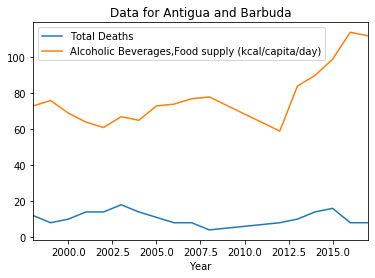

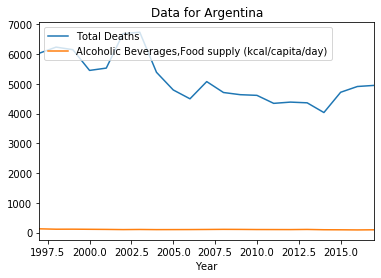

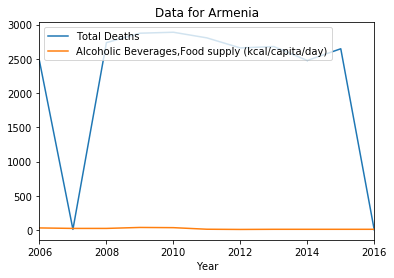

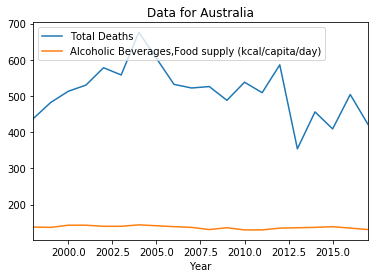

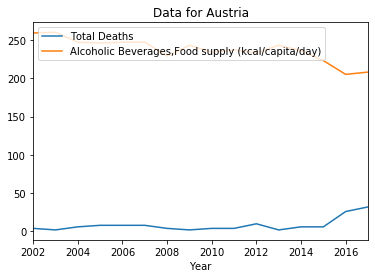

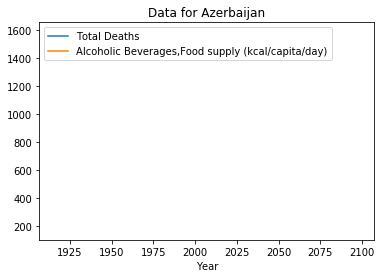

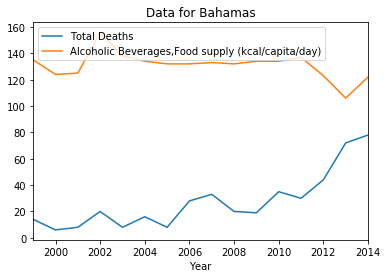

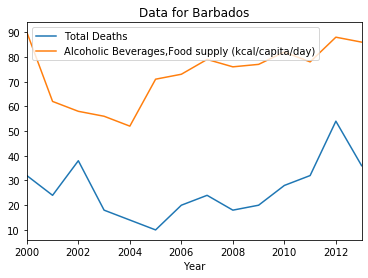

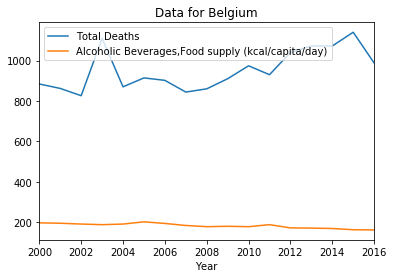

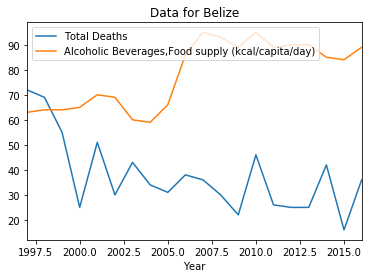

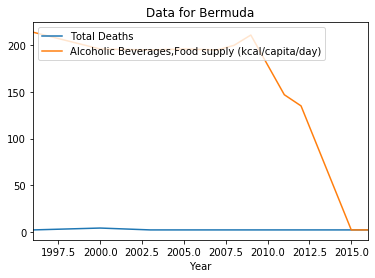

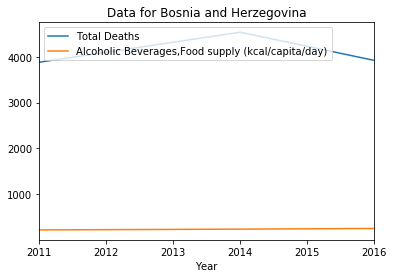

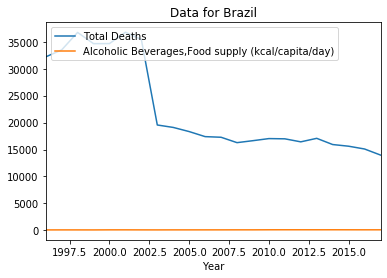

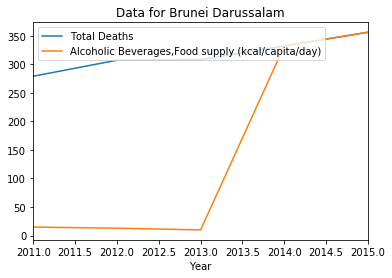

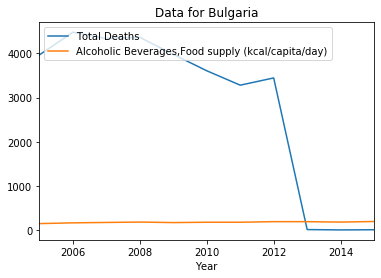

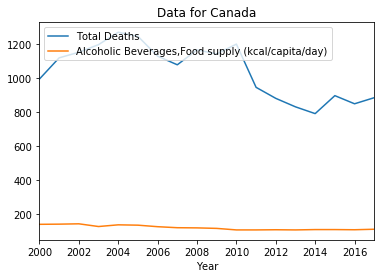

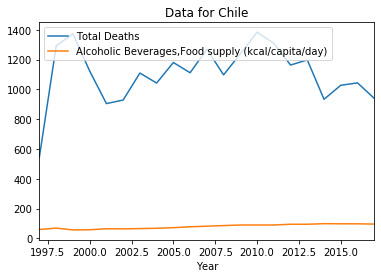

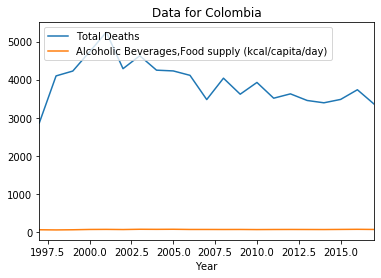

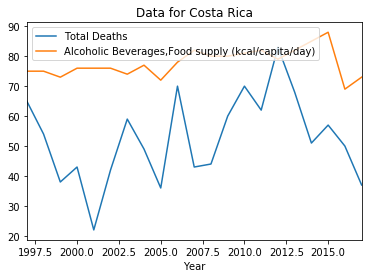

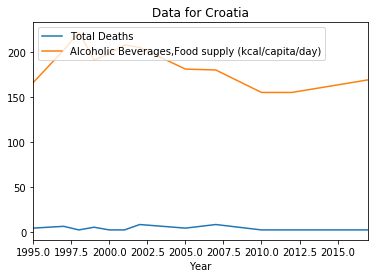

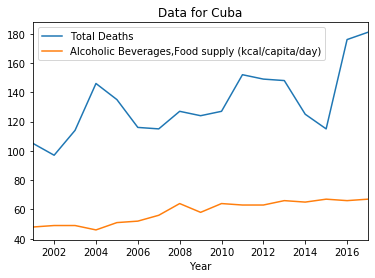

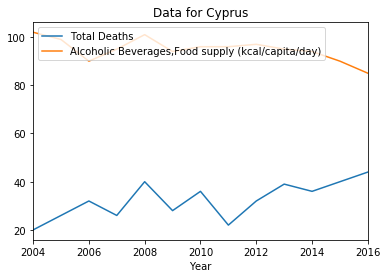

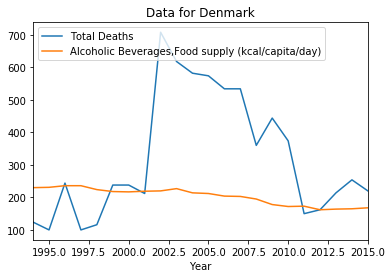

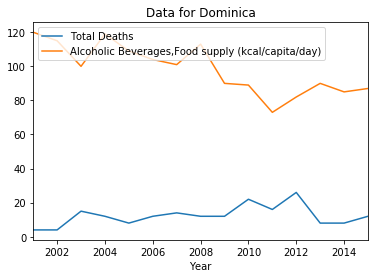

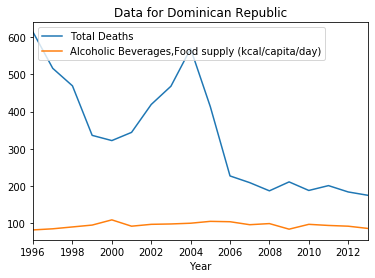

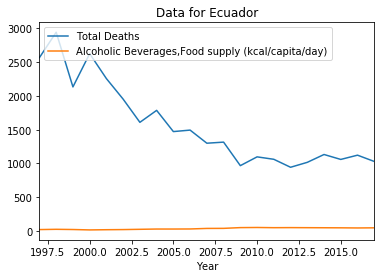

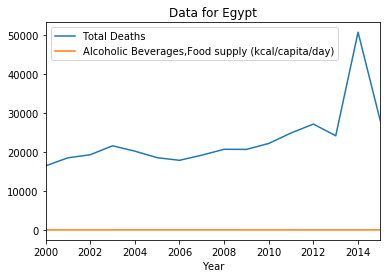

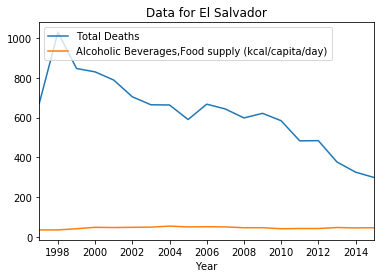

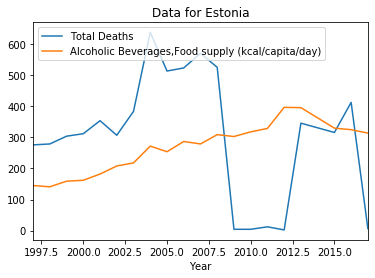

KeyboardInterrupt: 

In [114]:
countries = data.index.levels[0].unique()
data1 = data.reset_index()
for country in countries[:]:    
    plot_mortality(data_reduced, 'Alcoholic Beverages,Food supply (kcal/capita/day)', country)

## Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data_scaled = data_reduced.copy()

scaler = MinMaxScaler()
columns = data_scaled.columns
data_scaled = data_scaled.reset_index()
data_scaled[columns] = scaler.fit_transform(data_scaled[columns])

data_scaled = data_scaled.set_index(['Area', 'Year'])

data_scaled

Alcoholic Beverages,Food supply (kcal/capita/day)  \
Area                Year                                                      
Antigua and Barbuda 1998                                          -0.540909   
                    1999                                          -0.500922   
                    2000                                          -0.594226   
                    2001                                          -0.660872   
                    2002                                          -0.700859   
...                                                                     ...   
Uruguay             2014                                          -0.380959   
                    2015                                          -0.354301   
                    2016                                          -0.260997   
                    2017                                          -0.380959   
Uzbekistan          2016                                          -0.954114   

                          Animal Products,Food supply (kcal/capita/day)  \
Area                Year                                                  
Antigua and Barbuda 1998                                      -0.006930   
                    1999                                      -0.051851   
                    2000                                      -0.124416   
                    2001                                      -0.110594   
                    2002                                      -0.148604   
...                                                                 ...   
Uruguay             2014                                       0.224586   
                    2015                                       0.093278   
                    2016                                      -0.055307   
                    2017                                       0.107100   
Uzbekistan          2016                                      -0.279912   

                          Animal fats,Food supply (kcal/capita/day)  \
Area                Year                                              
Antigua and Barbuda 1998                                  -0.516618   
                    1999                                  -0.526694   
                    2000                                  -0.536771   
                    2001                                  -0.546847   
                    2002                                  -0.637535   
...                                                             ...   
Uruguay             2014                                  -0.425930   
                    2015                                  -0.536771   
                    2016                                  -0.466236   
                    2017                                  -0.476312   
Uzbekistan          2016                                  -0.808834   

                          Apples and products,Food supply (kcal/capita/day)  \
Area                Year                                                      
Antigua and Barbuda 1998                                          -0.587466   
                    1999                                          -0.587466   
                    2000                                          -0.587466   
                    2001                                          -0.513413   
                    2002                                          -0.587466   
...                                                                     ...   
Uruguay             2014                                           0.041986   
                    2015                                           0.079012   
                    2016                                           0.004959   
                    2017                                          -0.032067   
Uzbekistan          2016                                           0.745491   

                          Aquatic Animals, Others,Food supply (kcal/ca

## Create file name from food and cause

In [16]:
def create_file_name(food, cause):
    foods = food.split(';')
    file_name = ''
    for _food in foods:
        file_name += _food.split(',')[0] + ';'
    file_name = file_name[:-1]
    file_name += '=' + cause
    return file_name

# Build datasets for each cause group

In [37]:
import pathlib

correlations = pd.read_excel(r"C:\Users\Aleksandar\Downloads\Mortality\output\Mortality and Food correlations.xlsx")

target_from_excel = correlations['Cause'].unique()
finished_from_excel = []

foods_for_cause = dict()

for cause in target_from_excel:
    foods_for_cause[cause] = list(correlations.loc[correlations['Cause'] == cause, 'Food'].unique())
    
output_folder_name = 'icd9, partial spearman correlations, number of deaths per 100,000'
pathlib.Path(r'C:\Users\Aleksandar\Downloads\Mortality\output\datasets\{}'.format(output_folder_name)).mkdir(parents=True, exist_ok=True) 
pathlib.Path(r'C:\Users\Aleksandar\Downloads\Mortality\output\results\{}'.format(output_folder_name)).mkdir(parents=True, exist_ok=True) 
pathlib.Path(r'C:\Users\Aleksandar\Downloads\Mortality\output\filtered_results\{}'.format(output_folder_name)).mkdir(parents=True, exist_ok=True)

all_foods_causes = list(set([(food, cause) for food, cause in correlations[['Food', 'Cause']].values]))
#for k, v in foods_for_cause.items():
    #print(k, v)

In [38]:
from linearmodels import RandomEffects, PanelOLS, PooledOLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scale_data = False
include_hdi = True
include_temperature = False
reduce_data = False
interpolate_data = True
include_population = True
scale_foods = True

for cause, causes in diseaseCodesByGroup.items():
# for food, cause in all_foods_causes:
    if cause not in target_from_excel or cause in finished_from_excel:
        continue
    if cause in ['metabolic_syndrome']:
        continue
        
#     causes = diseaseCodesByGroup[cause]
    print(f"CAUSE: {cause}")
    
    # filter and merge by causes
    data = filter_and_merge(data_fao_with_codes, ['WHO code', 'Year'], data_icd, ['Country', 'Year'], causes)
    
    # merge with HDI
    if include_hdi:
        data = pd.merge(data.reset_index(), hdi_data.reset_index(), on=['Country', 'Year'])
        data = data.set_index(['Country', 'Year'])
        
    # merge with population data
    if include_population:
        data = pd.merge(data.reset_index(), population_data.reset_index(), on=['Country', 'Year'])
        data['Total Deaths'] = (data['Total Deaths'] * 100000) / data['Population']
        data = data.drop(columns='Population')
        data = data.set_index(['Country', 'Year'])
        
    # merge with temperature data
    if include_temperature:
        data = pd.merge(data.reset_index(), data_temp.reset_index(), on=['Country', 'Year'])
        data = data.set_index(['Country', 'Year'])
    
    # reduce percent of NaNs
    data_reduced = data.loc[:, :]
    if reduce_data:
        data_reduced = reduce_nan(data, 0.05)
        data_reduced = data_reduced.set_index(['Country', 'Year'])
        print("Reduced Nans", data_reduced.shape)
    
    # interpolate
    data_reduced = data_reduced.apply(lambda x: pd.to_numeric(x, errors='coerce'))
    if interpolate_data:
        data_reduced = data_reduced.interpolate(method='linear', limit_direction='backward', axis=1)
        print("converted to numeric, interpolated")
        
    if scale_foods:
        columns = [col for col in data_reduced.columns if col not in ['Total Deaths', 'HDI', 'Temperature - (Celsius)', \
                          'Grand Total,Food supply (kcal/capita/day),kcal/capita/day', 'Area Code', 'index',]]
        for col in columns:
            data_reduced[col] = data_reduced[col] * 100 / data_reduced['Grand Total,Food supply (kcal/capita/day),kcal/capita/day']
    
        
     ##########
#     if ';' in food:
#         food_cols = food[:].split(';')
#         food_cols = [col for col in food_cols if col in data_reduced.columns]
#         data_reduced[food] = data_reduced[food_cols].sum(axis=1)
#     data_reduced = data_reduced[[food, 'Total Deaths', 'Grand Total,Food supply (kcal/capita/day),kcal/capita/day', 'HDI']]
    ##########
    
    # drop columns with small number of different values
    nunique = data_reduced.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique < 5].index
    data_reduced = data_reduced.drop(cols_to_drop, axis=1)
    
    # create new columns and remove old ones
    cols_to_drop = []
    for foods in foods_for_cause[cause]:
        food_cols = foods.split(';')
        food_cols = [col for col in food_cols if col in data_reduced.columns]
        if len(food_cols) > 1:
            data_reduced[foods] = data_reduced[food_cols].sum(axis=1)
            cols_to_drop.extend([x for x in food_cols if x not in foods_for_cause[cause]])
    cols_to_drop = list(set(cols_to_drop))
    data_reduced = data_reduced.drop(cols_to_drop, axis=1)
    
    # scale
    data_scaled = data_reduced.copy()
    if scale_data:
        scaler = MinMaxScaler()
        columns = list(data_scaled.columns)
        columns.remove('Total Deaths')
        data_scaled = data_scaled.reset_index()
        data_scaled[columns] = scaler.fit_transform(data_scaled[columns])
        data_scaled['Total Deaths'] = np.log(data_scaled['Total Deaths'])
        data_scaled = data_scaled.set_index(['Country', 'Year'])
        
    filtered_cols = foods_for_cause[cause]
    filtered_cols.extend(['Total Deaths', 'HDI', #'Temperature - (Celsius)', \
                          'Grand Total,Food supply (kcal/capita/day),kcal/capita/day'])
    data_scaled = data_scaled[filtered_cols]
    
    data_scaled = data_scaled.reset_index()
    data_means = pd.DataFrame()
    for country in data_scaled['Country'].unique():
        data_country = data_scaled[data_scaled['Country'] == country]
        new_row = data_country.mean(axis=0)
        new_row = pd.DataFrame(new_row).transpose()
        new_row['Country'] = country
        data_means = data_means.append(new_row)
    
    file_name = cause
    data_means.to_csv(r"C:\Users\Aleksandar\Downloads\Mortality\output\datasets\{}\{}.csv"\
                       .format(output_folder_name, file_name))
    
    finished_from_excel.append(cause)

CAUSE: neoplasms


C:\Users\Aleksandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


converted to numeric, interpolated
CAUSE: mental_behavioural_disorders
converted to numeric, interpolated
CAUSE: nervous_system_diseases
converted to numeric, interpolated
CAUSE: circulatory_diseases
converted to numeric, interpolated
CAUSE: respiratory_diseases
converted to numeric, interpolated
CAUSE: digestive_diseases
converted to numeric, interpolated
CAUSE: malig_neoplasm_of_breast
converted to numeric, interpolated
CAUSE: malignant_neoplasms_of_digestive_organs
converted to numeric, interpolated
CAUSE: malignant_neoplasms_of_urinary_tract
converted to numeric, interpolated
CAUSE: cerebrovascular_diseases
converted to numeric, interpolated
CAUSE: ischaemic_heart_diseases
converted to numeric, interpolated
CAUSE: diseases_of_liver
converted to numeric, interpolated
CAUSE: malig_neoplasm_of_female_genital_organs
converted to numeric, interpolated
CAUSE: malig_neoplasm_of_lip_oral_cavity_and_pharynx
converted to numeric, interpolated
CAUSE: malignant_neoplasm_of_male_genital_organs


# Compute correlations

In [39]:
from pingouin import partial_corr

covar = ['HDI', 'Grand Total,Food supply (kcal/capita/day),kcal/capita/day']

for cause, causes in diseaseCodesByGroup.items():
    if cause not in target_from_excel:
        continue
        
    print(cause)
    
    data = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\output\datasets\{}\{}.csv".format(output_folder_name, cause))
#     data = pd.read_csv(r"C:\Users\Aleksandar\Downloads\Mortality\output\datasets\spearman correlations scaled data\{}.csv".format(cause))
    data = data.drop(columns=['Unnamed: 0', 'Year'])

    path = r'C:\Users\Aleksandar\Downloads\Mortality\output\results\{}\{}.txt'.format(output_folder_name, cause)
#     path = r'C:\Users\Aleksandar\Downloads\Mortality\output\results\partial pearson correlations, normalized total deaths\{}.txt'.format(cause)
    output_file = open(path, 'w')
    
    for column in data.columns:
        if column in ['Country', 'Total Deaths'] + covar:
            continue
        correlation = partial_corr(data=data, x=column, y='Total Deaths', covar=covar, method='spearman')
        output_file.write(f'{column} -> {str(correlation.r).split()[-5]}\n')
        
    output_file.close()

neoplasms
mental_behavioural_disorders
nervous_system_diseases
circulatory_diseases
respiratory_diseases
digestive_diseases
malig_neoplasm_of_breast
malignant_neoplasms_of_digestive_organs
malignant_neoplasms_of_urinary_tract
cerebrovascular_diseases
ischaemic_heart_diseases
diseases_of_liver
malig_neoplasm_of_female_genital_organs
malig_neoplasm_of_lip_oral_cavity_and_pharynx
malignant_neoplasm_of_male_genital_organs
all_causes
non_circulatory_diseases
diabetes
malignant_neoplasms_of_digestive_organs_and_malig_neoplasm_of_lip_oral_cavity_and_pharynx


## Find coefficient for cause and food

In [40]:
from os import path

def find_coefficient(food, cause):
    input_folder = r'C:\Users\Aleksandar\Downloads\Mortality\output\results\{}'.format(output_folder_name)
    input_path = f'{input_folder}\\{cause}.txt'
    
    if not path.isfile(input_path):
        return None
    
    input_file = open(input_path, 'r')
    
    coefficient = None
    for line in input_file.readlines():
        tokens = line.split(' -> ')
        if food == tokens[0]:
            coefficient = float(tokens[1])
            break
            
    input_file.close()
    
    return coefficient

## Write obtained coefficients to excel

In [41]:
correlations = pd.read_excel(r"C:\Users\Aleksandar\Downloads\Mortality\output\Mortality and Food correlations.xlsx")

for idx, row in correlations.iterrows():
    food = row['Food']
    cause = row['Cause']
    coefficient = find_coefficient(food, cause)
    if coefficient is None:
        # p value > 0.05
        coefficient = -9000
    correlations.at[idx, 'Obtained Coefficient'] = coefficient
    
correlations.to_excel(r"C:\Users\Aleksandar\Downloads\Mortality\output\correlations and obtained coefficients\Mortality and Food correlations {}.xlsx".format(output_folder_name))

## Script to compare correlations from table

In [42]:
def sign(expression):
    x = float(expression)
    if x == 0:
        return '0'
    return '+' if x > 0 else '-'

In [43]:
def n_matches():
    paper_correlations = [x for x in correlations['Correlation'].values]
    obtained_correlations = [x for x in correlations['Obtained Coefficient'].values]
    n = len(paper_correlations)
    match, dont_match = 0, 0
    for i in range(n):
        if obtained_correlations[i] != float(-9000):
            if sign(paper_correlations[i]) == sign(obtained_correlations[i]):
                match += 1
            else:
                dont_match += 1

    return match, dont_match

In [44]:
n_matches()

(101, 72)

In [45]:
with open(r"C:\Users\Aleksandar\Downloads\Mortality\output\matches.txt", "a") as file:
    file.write(f"\n{n_matches()} -> {output_folder_name}")